In [4]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [6]:
villes = pd.read_csv('./villes.csv', sep=';', header=0)

In [7]:
villes.head(3)

,ville,janv,fev,mars,avril,mai,juin,juil,aout,sept,oct,nov,dec
0,ajac,7.7,8.7,10.5,12.6,15.9,19.8,22.0,22.2,20.3,16.3,11.8,8.7
1,ange,4.2,4.9,7.9,10.4,13.6,17.0,18.7,18.4,16.1,11.7,7.6,4.9
2,ango,4.6,5.4,8.9,11.3,14.5,17.2,19.5,19.4,16.9,12.5,8.1,5.3


In [8]:
villes.shape

(32, 13)

In [11]:
x = villes.iloc[:, 1:13].values
labels = villes.iloc[:, 0].values
print("Ville : ", labels[0], ", Température : ", x[0])

Ville :  ajac , Température :  [ 7.7  8.7 10.5 12.6 15.9 19.8 22.  22.2 20.3 16.3 11.8  8.7]


# ACP

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [14]:
SC = StandardScaler()
SC.fit(x)
Xnorm = SC.transform(x)

In [16]:
pca = PCA(n_components=12)
pca.fit(Xnorm)

PCA(n_components=12)

In [18]:
pca.explained_variance_

array([10.80999558,  1.45184229,  0.0581652 ,  0.03279996,  0.01406283,
        0.00621041,  0.00523837,  0.00406512,  0.00187861,  0.00145726,
        0.0010361 ,  0.00034505])

In [19]:
pca.explained_variance_ratio_

array([0.87268193, 0.11720602, 0.00469563, 0.00264791, 0.00113528,
       0.00050136, 0.00042289, 0.00032817, 0.00015166, 0.00011764,
       0.00008364, 0.00002786])

In [20]:
pca.components_[0, :]

array([0.27151028, 0.28846164, 0.3010811 , 0.30354174, 0.28353089,
       0.27841907, 0.27290295, 0.28757774, 0.30472022, 0.3038548 ,
       0.29242808, 0.2729549 ])

In [22]:
pca.components_[1, :]

array([ 0.39933494,  0.29907184,  0.12943051, -0.11530598, -0.32314291,
       -0.35846763, -0.38879639, -0.3010133 , -0.11231622,  0.12249226,
        0.26269461,  0.38693688])

In [23]:
X_pca=pca.transform(Xnorm)

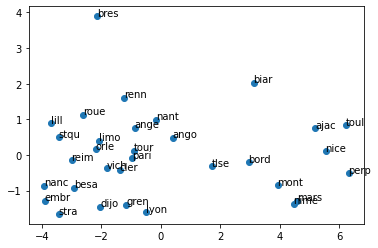

In [24]:
plt.scatter(X_pca[:, 0], X_pca[:, 1])
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points') 
plt.show()